<a href="https://colab.research.google.com/github/ashikshafi08/DUDL-Pytorch/blob/main/Overfitting_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 

import torch 
import torch.nn as nn 


## Cross Validation - Manual separation 

- How to implement cv manually using Numpy.
- How to perform CV on iris dataset. 

In [3]:
# Downloading the iris dataset 
import seaborn as sns 
iris = sns.load_dataset('iris')

# COnvert from pandas df to tensor
data = torch.tensor( iris[iris.columns[0:4]].values).float()

# Transform species to number 
labels = torch.zeros(len(data) , dtype = torch.long)
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2 

data.shape , labels.shape

(torch.Size([150, 4]), torch.Size([150]))

Here we will seperate the data into train and test set we won't be using the validation set here. 

In [4]:
# Splitting the data

# How many training examples? 
trainProp = .8 # not percentage, in proportion
nTraining = int(len(labels) *trainProp)

# Initialize a boolean vector to select data and labels 
trainTestBool = np.zeros(len(labels) , dtype = bool)

# Setting the first N samples to be True (so we can consider as training)
trainTestBool[range(nTraining)] = True 

trainTestBool

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,

If its True then it means the data is exposed to the training set and with False it belongs tot he test set. 

The main concern while splitting the dataset is label imabalance and this occurs if the labels in the dataset isn't balanced well and it hugely affects our model's performance and introduce bias. 

In [5]:
# Testing whether the splitted data is balanced or not 
print('Average of full data: ')
print(torch.mean(labels.float())) # =1 by definition 
print('\n')

print('Average on the training data: ')
print(torch.mean(labels[trainTestBool].float())) # should be 1


print('Average on the testing data: ') # should be 1
print(torch.mean(labels[~trainTestBool].float())) # should be 1

Average of full data: 
tensor(1.)


Average on the training data: 
tensor(0.7500)
Average on the testing data: 
tensor(2.)


In [6]:
# Shedding some randomness! 

trainTestBool = np.zeros(len(labels) , dtype = bool)


items2use4train = np.random.choice(range(len(labels)) , nTraining , replace = False)
items2use4train

array([ 47,  94, 127,  20,  16,  40,   4, 112,  35,   9,  21,  48,  69,
         1,  63,  85,  87, 137,   0, 119,  79,  67,  61,  83,  82, 107,
        59,  14, 106, 108,  12,  25, 109, 121, 117,  42,  37,  78,  24,
        75,  65, 138,  80,  73, 133, 102,  23,  55,  91, 129,  18, 103,
         8, 134, 147,  27,  38,  43, 124,  98,  36,  70, 104,  39,  30,
        84, 100, 146,  32,  44,  66,  54,  49,  77,  90,  11, 142,  10,
       148, 116,  33, 130,  68,  72,  96,  29, 125, 113, 128,  86,  74,
       144,  41, 143,  28,  99,  62,  45,  64,   6,  17, 122,  58,  26,
       136,  97, 105,  13,  22, 114, 141,   3,  31, 118,  56,  50,  34,
        89, 139, 131])

In [7]:
# Now for the above indexes we set the values to be True , that is training set 
trainTestBool[items2use4train] = True 
trainTestBool

array([ True,  True, False,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,

In [8]:
  # Testing whether the splitted data is balanced or not 
print('Average of full data: ')
print(torch.mean(labels.float())) # =1 by definition 
print('\n')

print('Average on the training data: ')
print(torch.mean(labels[trainTestBool].float())) # should be 1


print('Average on the testing data: ') # should be 1
print(torch.mean(labels[~trainTestBool].float())) # should be 1

Average of full data: 
tensor(1.)


Average on the training data: 
tensor(0.9500)
Average on the testing data: 
tensor(1.2000)


The larger the dataset the less we need to worry about the balance in labels. 

In [9]:
 # Create the ANN model 

ANNiris = nn.Sequential(
     nn.Linear(4 , 64) , 
     nn.ReLU(), 
     nn.Linear(64 , 64), 
     nn.ReLU(),
     nn.Linear(64, 3)
 )

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ANNiris.parameters() , lr = .01)


In [10]:
# Checking the shape of our dataset 

print(data.shape) # entire dataset 
print(data[trainTestBool, :].shape)
print(data[~trainTestBool, :].shape)

torch.Size([150, 4])
torch.Size([120, 4])
torch.Size([30, 4])


In [11]:
# Train and test the model 
numepochs = 1000 

# Intialize the losses to store 
losses = torch.zeros(numepochs)
onGoingAcc = []

# Loop over the epochs 
for epoch in range(numepochs):

  # Forward pass 
  yHat = ANNiris(data[trainTestBool, :])

  # Compute accuracy 
  acc = 100*torch.mean((torch.argmax(yHat , axis = 1) == labels[trainTestBool]).float())
  onGoingAcc.append(acc)

  # Compute the loss 
  loss = loss_func(yHat , labels[trainTestBool])
  losses[epoch] = loss 

  # Backward pass 
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



In [12]:
# Evaluating the test and train accuracies 

# Final forward pass to make predictions after making the prediction 
predictions = ANNiris(data[trainTestBool , :])
trainAcc = 100*torch.mean((torch.argmax(predictions , axis = 1 ) == labels[trainTestBool]).float())

# Final forward pass the trained model
predictions = ANNiris(data[~trainTestBool , :])
testAcc = 100*torch.mean((torch.argmax(predictions , axis = 1 ) == labels[~trainTestBool]).float())

trainAcc , testAcc

(tensor(98.3333), tensor(100.))

## Cross Validation - Scikit-learn
- Implement cv using the sklearn 
- Perform a parametric experiment with the fraction of train/test items.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Creating fake data to test the utility 
fakeData =  np.tile(np.array([1,2,3,4]) , (10 ,1)) + np.tile(10*np.arange(1 ,11) , (4,1) ).T
fakeLabels = np.arange(10) > 4 

print(fakeData) , print('')
print(fakeLabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]

[False False False False False  True  True  True  True  True]


In [15]:
# Using the funtionality to split the data 
trainData , testData , trainLabels , testLabels = train_test_split(fakeData , fakeLabels , test_size = .2 ,
                                                                   shuffle = False)

print(f'Train data shape: {trainData.shape}')
print(f'Test data shape: {testData.shape}')
print(f'Train labels shape: {trainLabels.shape}')
print(f'Test labels shape: {testLabels.shape}')

Train data shape: (8, 4)
Test data shape: (2, 4)
Train labels shape: (8,)
Test labels shape: (2,)


In [16]:
print(trainData)
print('\n')
print(testData)

[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]
 [41 42 43 44]
 [51 52 53 54]
 [61 62 63 64]
 [71 72 73 74]
 [81 82 83 84]]


[[ 91  92  93  94]
 [101 102 103 104]]


In [17]:
def createTheModel():

   # Create the ANN model 

  ANN = nn.Sequential(
     nn.Linear(4 , 64) , 
     nn.ReLU(), 
     nn.Linear(64 , 64), 
     nn.ReLU(),
     nn.Linear(64, 3)
  )

  lossfun = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(ANN.parameters() , lr = .01)

  return ANN , lossfun , optimizer


numepochs = 200 

def trainTheModel(trainProp):

  # Initialize the values to store the results 
  losses = torch.zeros(numepochs)
  trainAcc = []
  testAcc = []

  # Making the splits 
  # Inside the training loop will leads to mixing up of train and test data that leads to overfitting!
  X_train , X_test , y_train, y_test = train_test_split(data , labels , 
                                                          train_size = trainProp)

  # Loop over the epohcs 
  for epoch in range(numepochs):

    # Separate the train from test data 
    # Note 1: Unique split for each epoch 
    # Note 2: here we specify the amount of training size, not testing size 
    # X_train , X_test , y_train, y_test = train_test_split(data , labels ,  train_size = trainProp)
    
    # Forward pass 
    yHat = ANN(X_train)
    
    # Compute loss 
    loss = lossfun(yHat , y_train)

    # backward pass 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Compute the training accuracy 
    trainAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y_train).float()).item() )


    # Test accuracy 
    predLabels = torch.argmax(ANN(X_test) , axis = 1)
    testAcc.append( 100*torch.mean((predLabels == y_test).float()).item() )

  # Function output 
  return trainAcc, testAcc

In the above function we are making predictions on the test set inside a training loop, does it affect the results or hinder the performance? 

No, since we are computing the gradients and doing the backprop we only care about the training size of the model. 


In [18]:
# Testing the model by running it once 
ANN , lossfun, optimizer = createTheModel()

# Train the model 
# Training proportion 
trainAcc , testAcc = trainTheModel(.8)


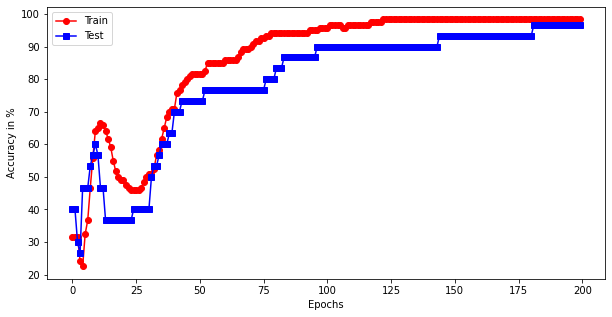

In [19]:
# Plot the results 
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10 , 5))

plt.plot(trainAcc , 'ro-')
plt.plot(testAcc , 'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy in %')
plt.legend(['Train' , 'Test'])
plt.show()




**Running the experiments** with different train set sizes. 



In [20]:
trainSetSizes = np.linspace(.2, .95 , 10)

# Storing all the accuracies 
allTrainAcc = np.zeros((len(trainSetSizes) , numepochs))
allTestAcc = np.zeros((len(trainSetSizes) , numepochs))

for i in range(len(trainSetSizes)):

  # Create a model 
  ANN , lossfun , optimizer = createTheModel()

  # Train the model
  trainAcc , testAcc = trainTheModel(trainSetSizes[i])

  # Store the results 
  allTrainAcc[i, :] = trainAcc
  allTestAcc[i , :] = testAcc



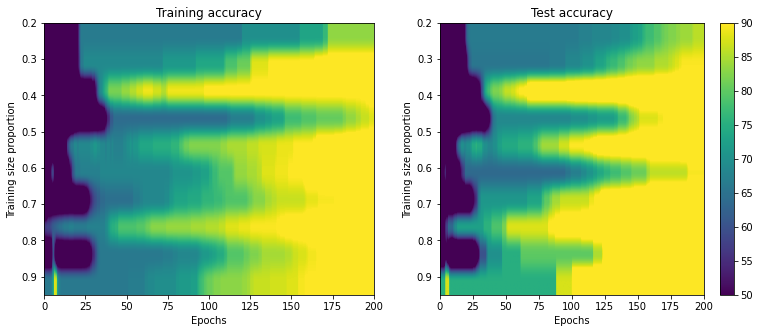

In [21]:
fig,ax = plt.subplots(1,2,figsize=(13,5))

ax[0].imshow(allTrainAcc,aspect='auto',
             vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training size proportion')
ax[0].set_title('Training accuracy')

p = ax[1].imshow(allTestAcc,aspect='auto',
             vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training size proportion')
ax[1].set_title('Test accuracy')
fig.colorbar(p,ax=ax[1])

plt.show()

In here the dataset is too small to draw any firm conclusions about the relationship between the training proportion and overall accuracy. 

## Cross validatin - DataLoader

- Another way to implement cross validation using scikit-learn and torch 
- about the DataLoader and Dataset pytorch objects 
- A bit about batches, which are important for speeding up learning and decreasing computation time. 



In [22]:
from torch.utils.data import DataLoader


In [23]:
# Creating an instance of the DataLoader object 
fakeDataLdr = DataLoader(fakeData , shuffle = True)
print(fakeDataLdr)
print(fakeDataLdr.batch_size)

1


In [24]:
# Iterate through the dataloader object 
for i , oneSample in enumerate(fakeDataLdr):
  print(i , oneSample , oneSample.shape)

  

0 tensor([[31, 32, 33, 34]]) torch.Size([1, 4])
1 tensor([[101, 102, 103, 104]]) torch.Size([1, 4])
2 tensor([[41, 42, 43, 44]]) torch.Size([1, 4])
3 tensor([[21, 22, 23, 24]]) torch.Size([1, 4])
4 tensor([[71, 72, 73, 74]]) torch.Size([1, 4])
5 tensor([[11, 12, 13, 14]]) torch.Size([1, 4])
6 tensor([[81, 82, 83, 84]]) torch.Size([1, 4])
7 tensor([[51, 52, 53, 54]]) torch.Size([1, 4])
8 tensor([[61, 62, 63, 64]]) torch.Size([1, 4])
9 tensor([[91, 92, 93, 94]]) torch.Size([1, 4])


Here we don't have the labels in here, because we have'nt passed the labels as a input into the DataLoader. 

We can create something similar to that `tf.data.Dataset` in Pytorch and its called as `torch.utils.data.TensorDataset()` in here we can bundel both the data and labels. Here no shuffling is applied all we are doing is bundling up the data inside a Dataset object. 

In [25]:
# We need to create a Dataset that contains the data and labels
fakeDataset = torch.utils.data.TensorDataset(torch.Tensor(fakeData) , torch.Tensor(fakeLabels))
print(fakeDataset.tensors)

(tensor([[ 11.,  12.,  13.,  14.],
        [ 21.,  22.,  23.,  24.],
        [ 31.,  32.,  33.,  34.],
        [ 41.,  42.,  43.,  44.],
        [ 51.,  52.,  53.,  54.],
        [ 61.,  62.,  63.,  64.],
        [ 71.,  72.,  73.,  74.],
        [ 81.,  82.,  83.,  84.],
        [ 91.,  92.,  93.,  94.],
        [101., 102., 103., 104.]]), tensor([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]))


In [26]:
# Input the dataset object inside a DataLoader for iteration
fakeDataLdr = DataLoader(fakeDataset , shuffle = True)

# iterate through the data 
for dat , lab in fakeDataLdr:
  print(dat , lab)

tensor([[31., 32., 33., 34.]]) tensor([0.])
tensor([[81., 82., 83., 84.]]) tensor([1.])
tensor([[21., 22., 23., 24.]]) tensor([0.])
tensor([[41., 42., 43., 44.]]) tensor([0.])
tensor([[91., 92., 93., 94.]]) tensor([1.])
tensor([[11., 12., 13., 14.]]) tensor([0.])
tensor([[51., 52., 53., 54.]]) tensor([0.])
tensor([[61., 62., 63., 64.]]) tensor([1.])
tensor([[101., 102., 103., 104.]]) tensor([1.])
tensor([[71., 72., 73., 74.]]) tensor([1.])


Now lets use the sklearn to split the data into train and test set 

In [27]:
# Instantiating the split 
train_data , test_data , train_labels , test_labels = train_test_split(fakeData , fakeLabels , test_size= .2)

# Put the above train and test into dataset 
trainDataset = torch.utils.data.TensorDataset(torch.Tensor(train_data) , 
                                              torch.Tensor(train_labels))
testDataset = torch.utils.data.TensorDataset(torch.Tensor(test_data) , 
                                             torch.Tensor(test_labels))

# Creating a separate Dataloder for both sets 
trainLoader = DataLoader(trainDataset , batch_size = 4)
testLoader = DataLoader(testDataset)

trainLoader , testLoader

(<torch.utils.data.dataloader.DataLoader at 0x7f468d3cbdd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f468ce75390>)

In [28]:
# Iterating the dataloader 
for batch , label in trainLoader:
  print(batch , label)
  print('\n')

tensor([[31., 32., 33., 34.],
        [41., 42., 43., 44.],
        [91., 92., 93., 94.],
        [71., 72., 73., 74.]]) tensor([0., 0., 1., 1.])


tensor([[ 11.,  12.,  13.,  14.],
        [ 81.,  82.,  83.,  84.],
        [101., 102., 103., 104.],
        [ 61.,  62.,  63.,  64.]]) tensor([0., 1., 1., 1.])




We cann see how its batched in a group of 4 and the element size is 2. 

**On the real data**

In [29]:
# Downloading the iris dataset 
import seaborn as sns 
iris = sns.load_dataset('iris')

# COnvert from pandas df to tensor
data = torch.tensor( iris[iris.columns[0:4]].values).float()

# Transform species to number 
labels = torch.zeros(len(data) , dtype = torch.long)
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2 

data.shape , labels.shape

(torch.Size([150, 4]), torch.Size([150]))

In [30]:
# Splitting the data at first 
train_data , test_data , train_labels , test_labels = train_test_split(data , labels ,
                                                                       train_size = .8)

# Converting the above into a Dataset 
trainDataset = torch.utils.data.TensorDataset(train_data , train_labels)
testDataset = torch.utils.data.TensorDataset(test_data ,test_labels)

# Converting the above into a DataLoader 
trainLoader = DataLoader(trainDataset , batch_size= 12 , shuffle = True)
testLoader = DataLoader(testDataset , batch_size= testDataset.tensors[0].shape[0]) # here we take the total number of samples in the testDataset as batch size

# Iterating inside 
for batch , labels in trainLoader:
  print(batch.shape , labels.shape)

torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])


In [31]:
for x , y in testLoader:
  print(x.shape , y.shape)

# here it has all of the test data 

torch.Size([30, 4]) torch.Size([30])


In [32]:
# Creating the model 

def createANN():

  model = nn.Sequential(
      nn.Linear(4 , 64), 
      nn.ReLU(), 
      nn.Linear(64 , 64) , 
      nn.ReLU(), 
      nn.Linear(64 , 3)
  )

  # Loss function 
  lossfun = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters() , lr = .01)

  return model , lossfun , optimizer


In [33]:
# Training the model 

numepochs = 500 

def trainTheModel():

  # Intialize accuracies as empties (we wont be storing losses here)
  trainAcc = []
  testAcc = [] 
  for epoch in range(numepochs):

    # Iterating inside a dataloader. 
    batchAcc = [] # for each batch 
    for X , y in trainLoader:

      # Forward pass and loss 
      yHat = model(X) # applying for the data in the mini-batch
      loss = lossfun(yHat , y) # applying for the data in the mini-batch

      # Backprop 
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # Compute training accuracy for the batch 
      batchAcc.append( 100*torch.mean((torch.argmax(yHat , axis = 1) == y).float()).item())
  ## end of batch loop.....

    # Now that we've trained through the mini-batches, get their average training accuracy 
    trainAcc.append(np.mean(batchAcc))

    # Test accuracy 
    x , y = next(iter(testLoader)) # extract x and y 
    predLabels = torch.argmax(model(x) , axis = 1)
    testAcc.append(100*torch.mean((predLabels == y).float()).item())

  # fFunction output 
  return trainAcc , testAcc




In [34]:
# create a model
model,lossfun,optimizer = createANN()

# train the model
trainAcc,testAcc = trainTheModel()


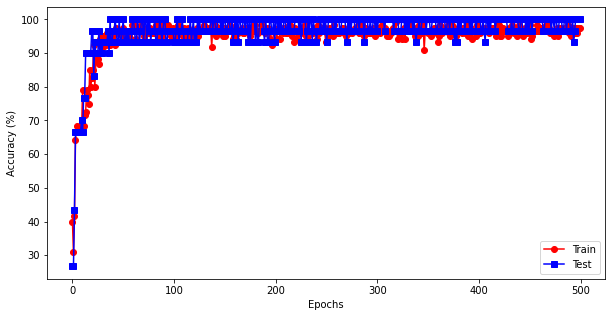

In [35]:
# plot the results
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])

# optional zoom-in to final epochs
# plt.xlim([300,500])
# plt.ylim([90,100.5])

plt.show()

Before while we're not using the DataLoader our models increase in performance took place from the 200-300 epoch. But when we used a `DataLoader` here right from the 20-40 epochs our models performance seems to rise and reach nearly 100% real soon. 

We can see how making a minor changes leads to greater efficiency on training the models.

## Splitting the data into train, dev and test set. 

In [36]:
fakeData , fakeLabels

(array([[ 11,  12,  13,  14],
        [ 21,  22,  23,  24],
        [ 31,  32,  33,  34],
        [ 41,  42,  43,  44],
        [ 51,  52,  53,  54],
        [ 61,  62,  63,  64],
        [ 71,  72,  73,  74],
        [ 81,  82,  83,  84],
        [ 91,  92,  93,  94],
        [101, 102, 103, 104]]),
 array([False, False, False, False, False,  True,  True,  True,  True,
         True]))

Will use the `train_test_split` where we specify the partitions that has to be done. 
- Firstly split the data into train and test set. 
- From the above test set make two splits namely dev and test set. 

In [37]:
# Order of the partition is train, dev and test set 
partitions = [.8 , .1 , .1]

# Split the data (train and temporary test set )
train_data , testTMP_data, train_labels , testTMP_labels = train_test_split(fakeData , fakeLabels , 
                                                                            train_size = partitions[0])

# Now specifying the split 
# if we used the above partition we will get an error, as there is only two samples in our test set so its impossible to split 10% from it
# So we divide the dev set by the sum of dev and test set -> this gives us the half remains 
split = partitions[1] / np.sum(partitions[1:])
devset_data , test_data , devset_labels , test_labels = train_test_split(testTMP_data , testTMP_labels , 
                                                                         train_size = split)

# Printing out the shapes 

print(f'Train data: {train_data.shape}')
print(f'Train labels: {train_labels.shape}')
print('\n')

print(f'Dev data: {devset_data.shape}')
print(f'Dev labels: {devset_labels.shape}')
print('\n')

print(f'Test data: {test_data.shape}')
print(f'Test labels: {test_labels.shape}')

Train data: (8, 4)
Train labels: (8,)


Dev data: (1, 4)
Dev labels: (1,)


Test data: (1, 4)
Test labels: (1,)


## Cross validation on regression 

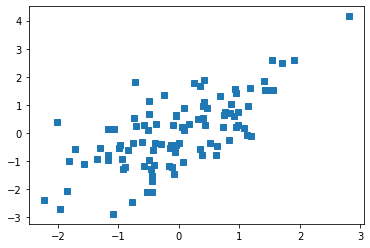

In [38]:
N = 100 
x = torch.randn(N , 1)
y = x + torch.randn(N ,1)

# Plot 
plt.plot(x ,y , 's')
plt.show()

In [39]:
 # A Continous model
ANNreg = nn.Sequential(
    nn.Linear(1 , 1), 
    nn.ReLU(),
    nn.Linear(1 , 1)
)

learningRate = .05
lossfun = nn.MSELoss()
optimizer = torch.optim.SGD(ANNreg.parameters() , lr = learningRate)

# Select the data for training 
trainIdx = np.random.choice(range(N) , 80 , replace = False) # random indices

# Initialize vector of Falses 
trainBool = np.zeros(N , dtype = bool) 

# With the random indices select the samples that set to be True
trainBool[trainIdx] = True 


# Show the sizes 
print(x[trainBool].shape)
print(x[~trainBool].shape)

torch.Size([80, 1])
torch.Size([20, 1])


In [40]:
# Training loop 
numepochs = 500 
for epoch in range(numepochs):

  # Forward pass 
  yHat = ANNreg(x[trainBool])

  # Loss function 
  loss = lossfun(yHat , y[trainBool])

  # Backward pass 
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



In [41]:
# Compute losses on the test set 
predYTest= ANNreg(x[~trainBool])
testLoss = (predYTest - y[~trainBool]).pow(2).mean()

# print out the finall train loss and test loss 
print(loss.detach()) # final step of the training
print('\n')
print(testLoss.detach())

tensor(0.8369)


tensor(0.6891)


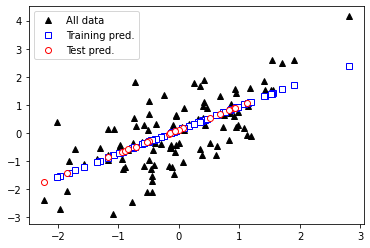

In [43]:
### plot the data

# predictions for final training run
predYtrain = ANNreg(x[trainBool]).detach().numpy()

# now plot
plt.plot(x,y,'k^',label='All data')
plt.plot(x[trainBool], predYtrain,
         'bs',markerfacecolor='w',label='Training pred.')
plt.plot(x[~trainBool],predYTest.detach(),
         'ro',markerfacecolor='w',label='Test pred.')
plt.legend()
plt.show()